In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

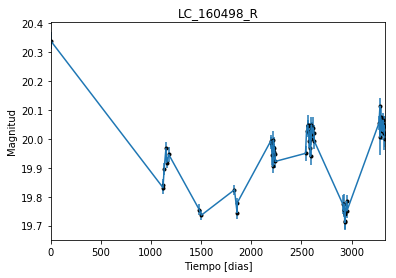

In [2]:
data = np.genfromtxt('LC_160498_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_160498_R')
plt.savefig("LC_160498_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

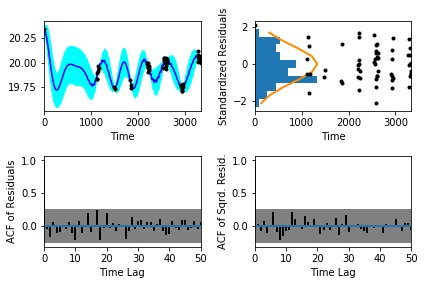

In [5]:
sample.assess_fit()

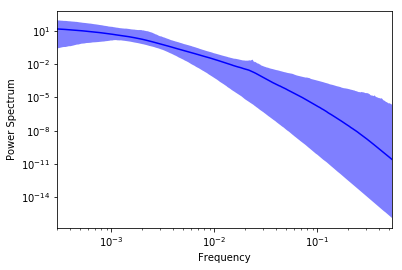

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

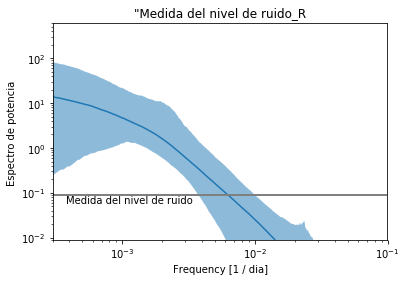

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_160498_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_160498_R')

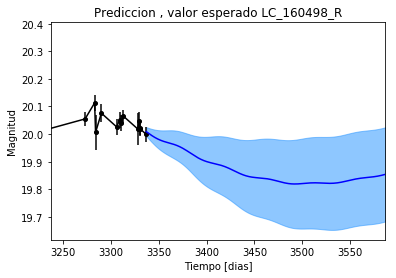

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_160498_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_160498_R')

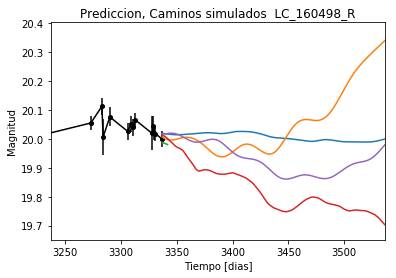

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_160498_R')

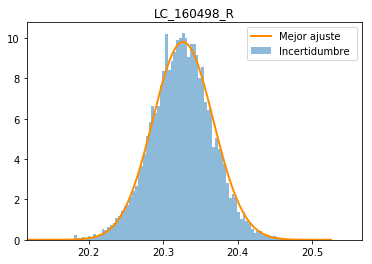

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_160498_R')
plt.savefig("Mejor_ajuste_LC_160498_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_160498_R')

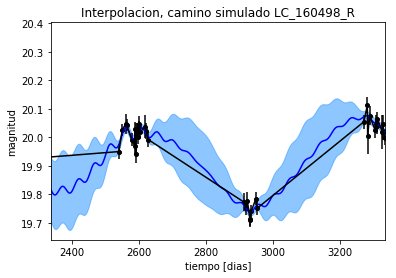

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_R')

Text(0.5,1,'Interpolacion, camino simulado LC_160498_R')

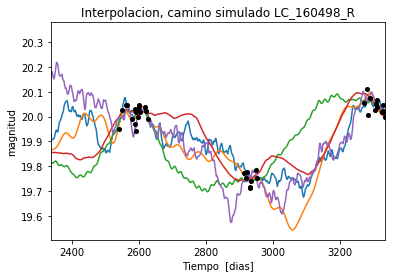

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 565.668995981
Median: 0.00916155873758
Standard deviation: 0.201285342302
68% credibility interval: [ 0.00070329  0.19237917]
95% credibility interval: [  3.30522412e-04   8.16554104e-01]
99% credibility interval: [  3.08406951e-04   1.00483091e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 413.051605025
Median: 0.00245734065839
Standard deviation: 0.0862681064582
68% credibility interval: [ 0.00047176  0.03043569]
95% credibility interval: [ 0.00032007  0.25347972]
99% credibility interval: [  3.04010712e-04   6.29667251e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 576.817202277
Median: 0.0207605345498
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 664.003113244
Median: 127.602538386
Standard deviation: 1.87168137906
68% credibility interval: [ 125.58704394  129.07842442]
95% credibility interval: [ 122.90393849  130.24150888]
99% credibility interval: [ 120.75254308  131.34101647]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 198.566355764
Median: 0.53251179812
Standard deviation: 2.43306883978
68% credibility interval: [ 0.05316293  4.2537193 ]
95% credibility interval: [ 0.01661254  8.17794286]
99% credibility interval: [  1.12358983e-02   1.14337932e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 384.967217547
Median: 0.479907260564
Standard deviation: 9.85785088965
68% credibility interval: [ 0.02432327  8.52182372]
95% credibility interval: [  2.45

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 266.780986198
Median: 9.69439844557e-58
Standard deviation: 1.67577420683e+77
68% credibility interval: [  1.22554193e-104   2.08282338e-005]
95% credibility interval: [  3.51055953e-214   5.96599144e+043]
99% credibility interval: [  3.08495675e-247   6.91751455e+077]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 782.935249744
Median: 19.9496410119
Standard deviation: 0.095143054778
68% credibility interval: [ 19.87872641  20.04412485]
95% credibility interval: [ 19.78323341  20.16558403]
99% credibility interval: [ 19.68432129  20.26134373]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 294.893981218
Median: 0.0214626889669
Standard deviation: 0.245760008262
68% credibility interval: [ 0.          0.31671637]
95% credibility interval: [ 0.         0.9286817]
99% credibility interval: [ 0.          1.04479903]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 294.893981218
Median: 0.0214626889669
Standard deviation: 0.245760008262
68% credibility interval: [ 0.          0.31671637]
95% credibility interval: [ 0.         0.9286817]
99% credibility interval: [ 0.          1.04479903]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 387.009568074
Median: 0.0
Standard deviation: 0.000694740281204
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 664.003113244
Median: 127.602538386
Standard deviation: 1.87168137906
68% credibility interval: [ 125.58704394  129.07842442]
95% credibility interval: [ 122.90393849  130.24150888]
99% credibility interval: [ 120.75254308  131.34101647]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1844.07652587
Median: 0.0346284500808
Standard deviation: 0.0422533194676
68% credibility interval: [ 0.0214487   0.06005802]
95% credibility interval: [ 0.0145346   0.13681843]
99% credibility interval: [ 0.01151325  0.29262505]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2192.23274696
Median: 0.981415400281
Standard deviation: 0.184438629412
68% credibility interval: [ 0.82003165  1.17925652]
95% credibility interval: [ 0.69600127  1.40938153]
99% credibility interval: [ 0.64191087  1.57927075]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 653.663596715
Median: 0.000264168854186
Standard deviation: 0.117633826652
68% credibility interval: [  4.39345500e-06   1.33344132e-02]
95% credibility interval: [  1.20289950e-46   1.48349589e-01]
99% credibility interval: [  2.53185238e-81   6.04729832e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 565.668995981
Median: (-0.0575637712508-0.701956924021j)
Standard deviation: 1.99597494503
68% credibility interval: [-1.20875394+0.j        -0.00441889-4.6010017j]
95% credibility interval: [ -5.13056075e+00+0.j          -2.07673357e-03-0.18639079j]
99% credibility interval: [ -6.31353880e+00+0.j          -1.93777802e-03-0.00388644j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 413.051605025
Median: (-0.0154399267195+1.89699643374j)
Standard deviation: 1.63652756679
68% credibility interval: [-0.19123310+0.30465619j -0.00296415+0.91091635j]
95% credibility interval: [-1.59266006+5.44451308j -0.00201107+0.56779147j]
99% credibility interval: [ -3.95631602e+00+4.36431214j  -1.91015564e-03+0.01336986j]
Posterior summa